# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading titanic dataset from seaborn dataset

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

# Missing values in dataset

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
df.embark_town.mode()[0]

'Southampton'

In [10]:
round(df.age.mean(),2)

29.7

# Handling Nan values of column age and column embark_town

# Filling all nan values of age column by mean value

In [17]:
df['age']=df['age'].fillna(round(df.age.mean(),2))

# column embark_town nan values with most_freq value

In [21]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [22]:
df['embark_town']=df['embark_town'].fillna(df.embark_town.mode()[0])

In [23]:
df['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [24]:
df.shape

(891, 15)

In [25]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Dropping deck columns

In [27]:
df.drop('deck',axis=1,inplace=True)

In [28]:
df.shape

(891, 14)

In [29]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean age is 29.699 and the oldest passenger in this data set was 80
years old, while the youngest was only .42 years old (about 5 months).

# EDA

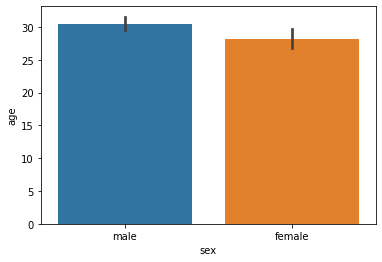

In [32]:
sns.barplot(x = 'sex', y = 'age', data = df)
plt.show()

The plot clearly shows that the average age for all male passengers is
above 30 while the average age of the female passengers is between 25
and 30.

# Get a count of the number of survivors

0 represents not survived
1 means survived.

In [33]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

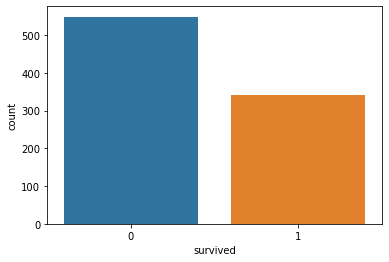

In [34]:
sns.countplot(x = "survived", data = df)
plt.show()

In [35]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


# the survival rate of each class - barplot

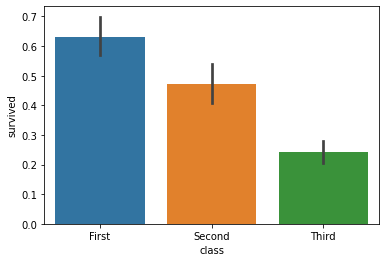

In [36]:
sns.barplot(x = 'class', y = 'survived', data = df)
plt.show()

# Let’s understand the survival rate by gender and class.

In [37]:
result = df.pivot_table('survived', index = 'sex', columns = 'class')

In [38]:
result

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Let’s understand the survival rate by gender, age and class.

In [40]:
import pandas as pd
diff_ages = pd.cut(df['age'], [0, 18, 80])

In [41]:
diff_ages

0      (18, 80]
1      (18, 80]
2      (18, 80]
3      (18, 80]
4      (18, 80]
         ...   
886    (18, 80]
887    (18, 80]
888    (18, 80]
889    (18, 80]
890    (18, 80]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [42]:
result = df.pivot_table('survived', ['sex', diff_ages], 'class')

In [43]:
result

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

# Finding Most of the tickets sold on the basis of fare

In [45]:
import warnings
warnings.filterwarnings('ignore')

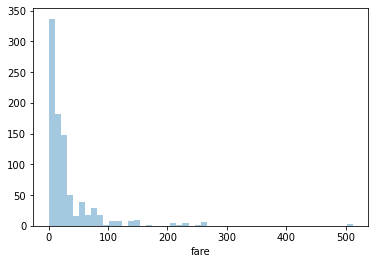

In [46]:
sns.distplot(df['fare'], kde = False)
plt.show()

The above plot shows that most of the tickets have been sold between 0
and 50 dollars.

#  boxplot with survived

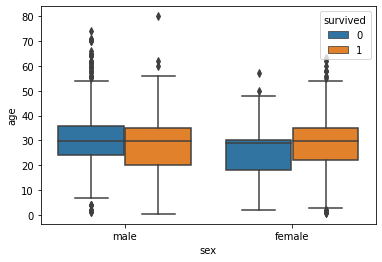

In [50]:
sns.boxplot(x = 'sex', y = 'age', data = df, hue = "survived")
plt.legend(loc='upper right',title='survived')
plt.show()